In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.linear_model import LinearRegression

from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=20,10

tf.random.set_seed(42)

from stldecompose import decompose

C:\Users\mert_\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_excel('Data2013-2018.xlsx',parse_dates=['Tarih'],index_col='Tarih')
data.head(10)

,Tır_sayısı,Tr_ihracat,Tr_ithalat,Tekstil_endeks,Tekstil_ihracat,Tekstil_ithalat
Tarih,,,,,,
2013-01-06,27,408563041,667990409,69.705719,966598,532532
2013-01-13,24,408563041,667990409,69.705719,966598,532532
2013-01-20,20,408563041,667990409,69.705719,966598,532532
2013-01-27,18,408563041,667990409,69.705719,966598,532532
2013-02-03,15,430112486,677120671,67.873016,948586,530985
2013-02-10,20,430112486,677120671,67.873016,948586,530985
2013-02-17,11,430112486,677120671,67.873016,948586,530985
2013-02-24,19,430112486,677120671,67.873016,948586,530985
2013-03-03,16,450508767,776999802,77.850811,1043015,571867


In [3]:
decopm=decompose(data.Tır_sayısı)

In [4]:
data['Mevsimsellik']=decopm.seasonal
data['Trend']=decopm.trend

In [5]:
data['Hafta']=data.index.week
data['Ay']=data.index.month
data['Çeyrek']=data.index.quarter
data

<ipython-input-5-66971ade333b>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['Hafta']=data.index.week


,Tır_sayısı,Tr_ihracat,Tr_ithalat,Tekstil_endeks,Tekstil_ihracat,Tekstil_ithalat,Mevsimsellik,Trend,Hafta,Ay,Çeyrek
Tarih,,,,,,,,,,,
2013-01-06,27,408563041,667990409,69.705719,966598,532532,10.060784,17.299729,1,1,1
2013-01-13,24,408563041,667990409,69.705719,966598,532532,7.104357,17.256156,2,1,1
2013-01-20,20,408563041,667990409,69.705719,966598,532532,3.147930,17.212583,3,1,1
2013-01-27,18,408563041,667990409,69.705719,966598,532532,1.191502,17.169011,4,1,1
2013-02-03,15,430112486,677120671,67.873016,948586,530985,-1.764973,17.125486,5,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-07,12,760867137,648732805,225.217434,1076780,445182,-1.356423,13.716936,40,10,4
2018-10-14,11,760867137,648732805,225.217434,1076780,445182,-2.373573,13.734086,41,10,4
2018-10-21,10,760867137,648732805,225.217434,1076780,445182,-3.390723,13.751236,42,10,4


In [6]:
#import statsmodels.api as sm
#x=data.iloc[:,[1,2,3,4,5,6,7,8,9,10]].values
#model=sm.OLS(data.Tır_sayısı.values,x).fit()
#print(model.summary())

array([[<AxesSubplot:title={'center':'Tır_sayısı'}>,
        <AxesSubplot:title={'center':'Tekstil_endeks'}>],
       [<AxesSubplot:title={'center':'Tekstil_ihracat'}>,
        <AxesSubplot:title={'center':'Tekstil_ithalat'}>],
       [<AxesSubplot:title={'center':'Mevsimsellik'}>,
        <AxesSubplot:title={'center':'Trend'}>]], dtype=object)

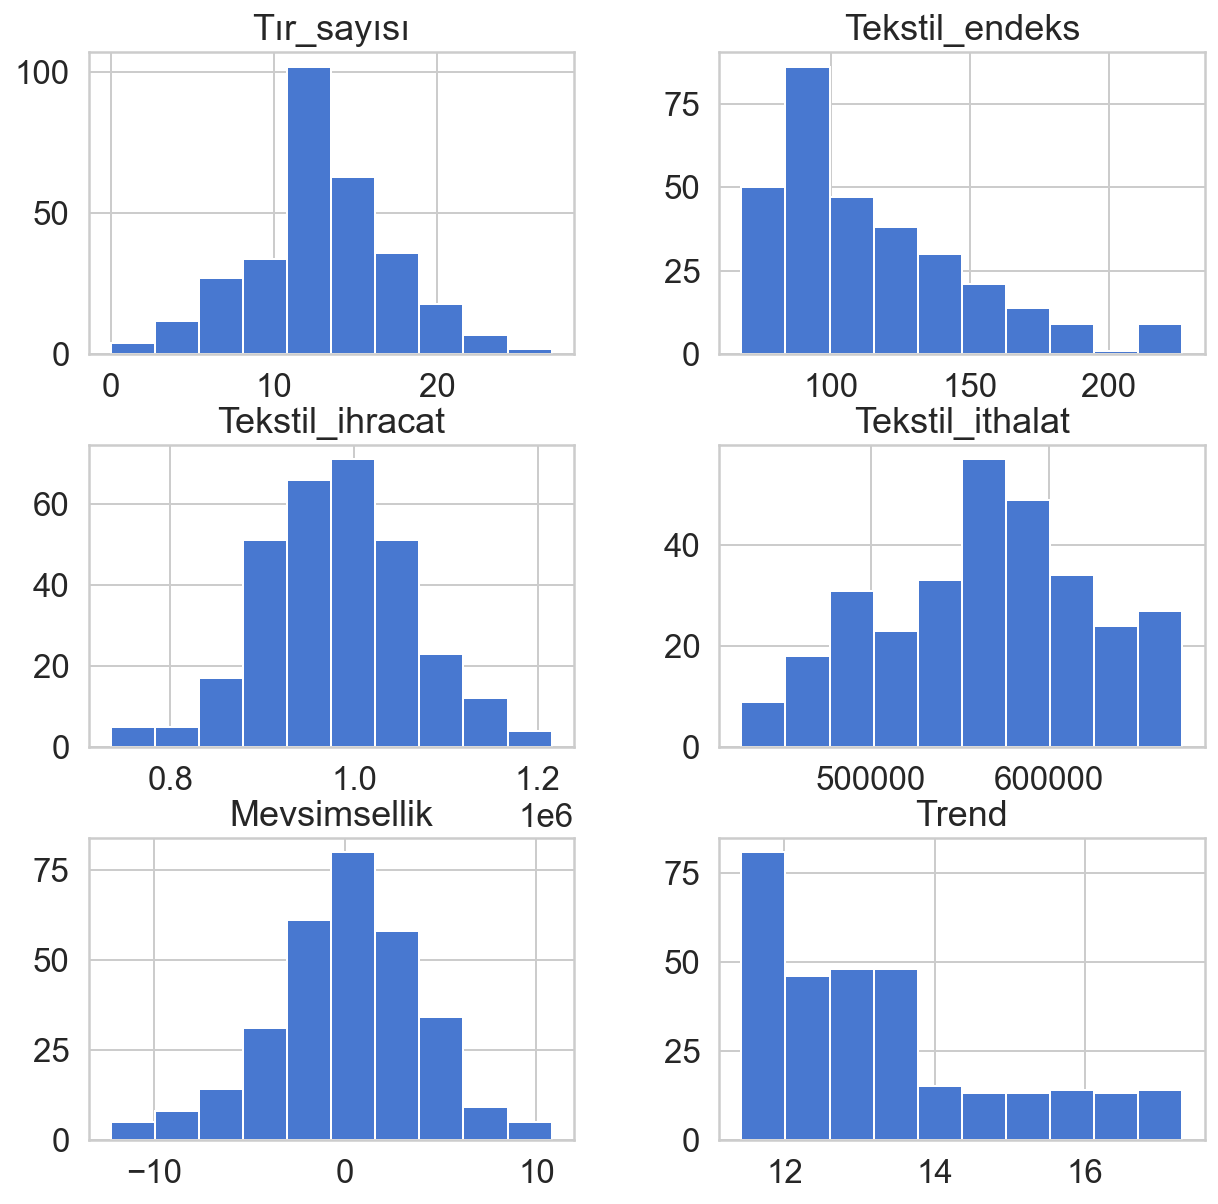

In [7]:
'''plt.style.use('ggplot')
plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(2, 3)
#fig.suptitle('Compare SARIMAX, prophet, XGBOOST and NN')
axs[0,0].hist(data.Tekstil_endeks)
axs[0,0].set_title("Tekstil_endeks")
axs[0,1].hist(data.Tekstil_ihracat)
axs[0,1].set_title("Tekstil_ihracat")
axs[0,2].hist(data.Tekstil_ithalat)
axs[0,2].set_title("Tekstil_ithalat")
axs[1,0].hist(data.Mevsimsellik)
axs[1,0].set_title("Mevsimsellik")
axs[1,1].hist(data.Trend)
axs[1,1].set_title("Trend")
plt.savefig('X')'''
data.hist(column=['Tır_sayısı','Tekstil_endeks','Tekstil_ihracat','Tekstil_ithalat','Mevsimsellik','Trend'],figsize=(10,10))

In [8]:
names=data.columns
names

Index(['Tır_sayısı', 'Tr_ihracat', 'Tr_ithalat', 'Tekstil_endeks',
       'Tekstil_ihracat', 'Tekstil_ithalat', 'Mevsimsellik', 'Trend', 'Hafta',
       'Ay', 'Çeyrek'],
      dtype='object')

<AxesSubplot:xlabel='Tarih', ylabel='Tır_sayısı'>

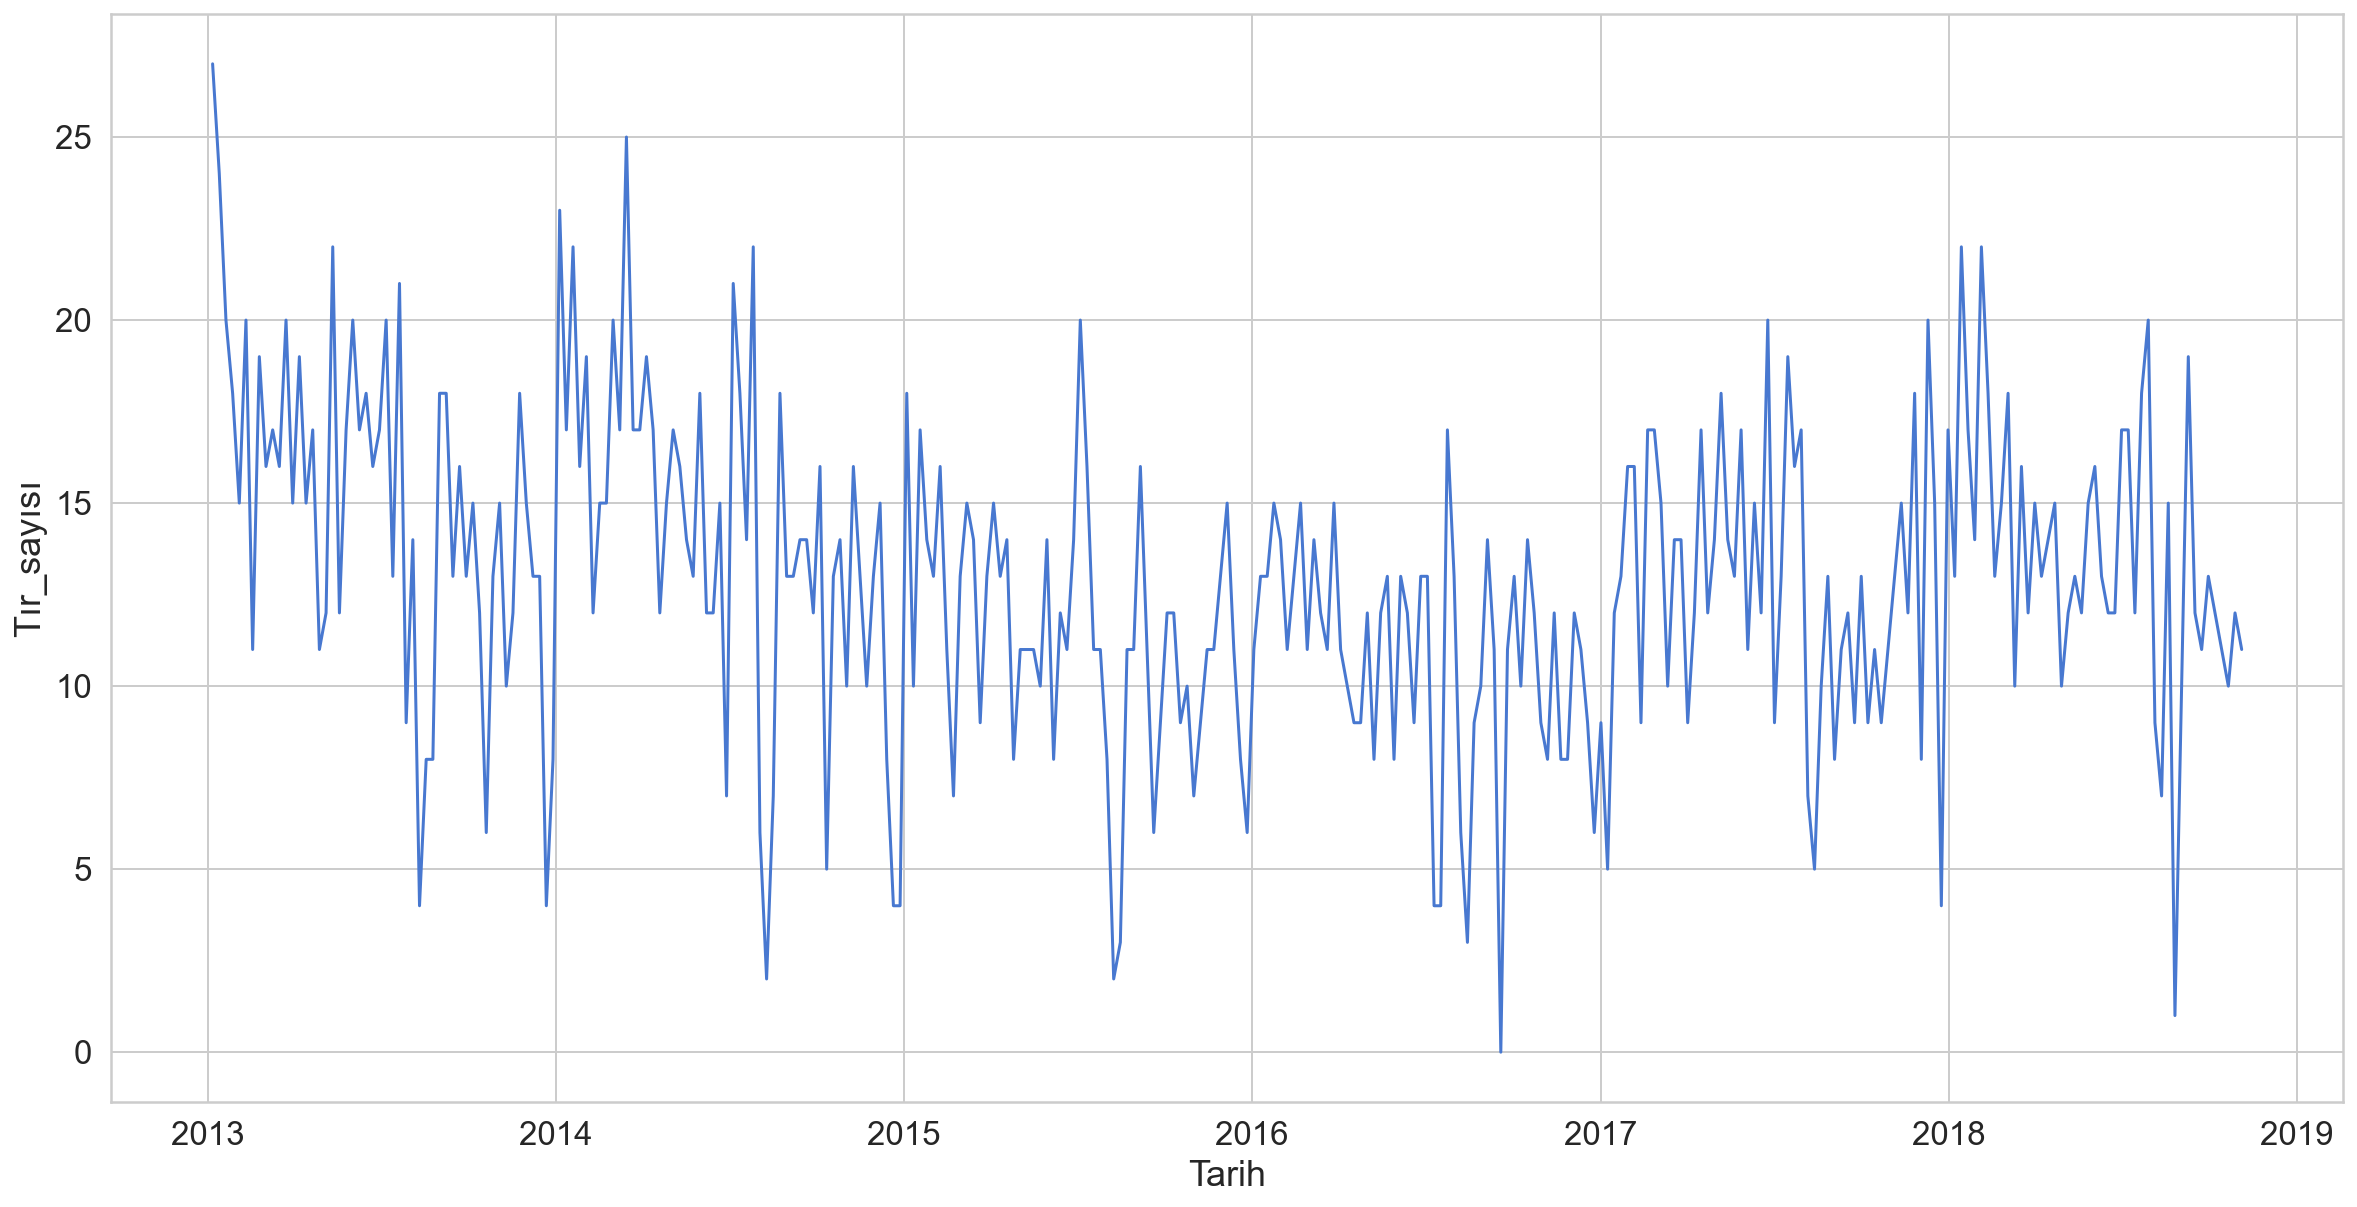

In [9]:
sns.lineplot(x=data.index,y='Tır_sayısı',data=data)
#plt.savefig('ss3')

<AxesSubplot:xlabel='Tarih', ylabel='Tır_sayısı'>

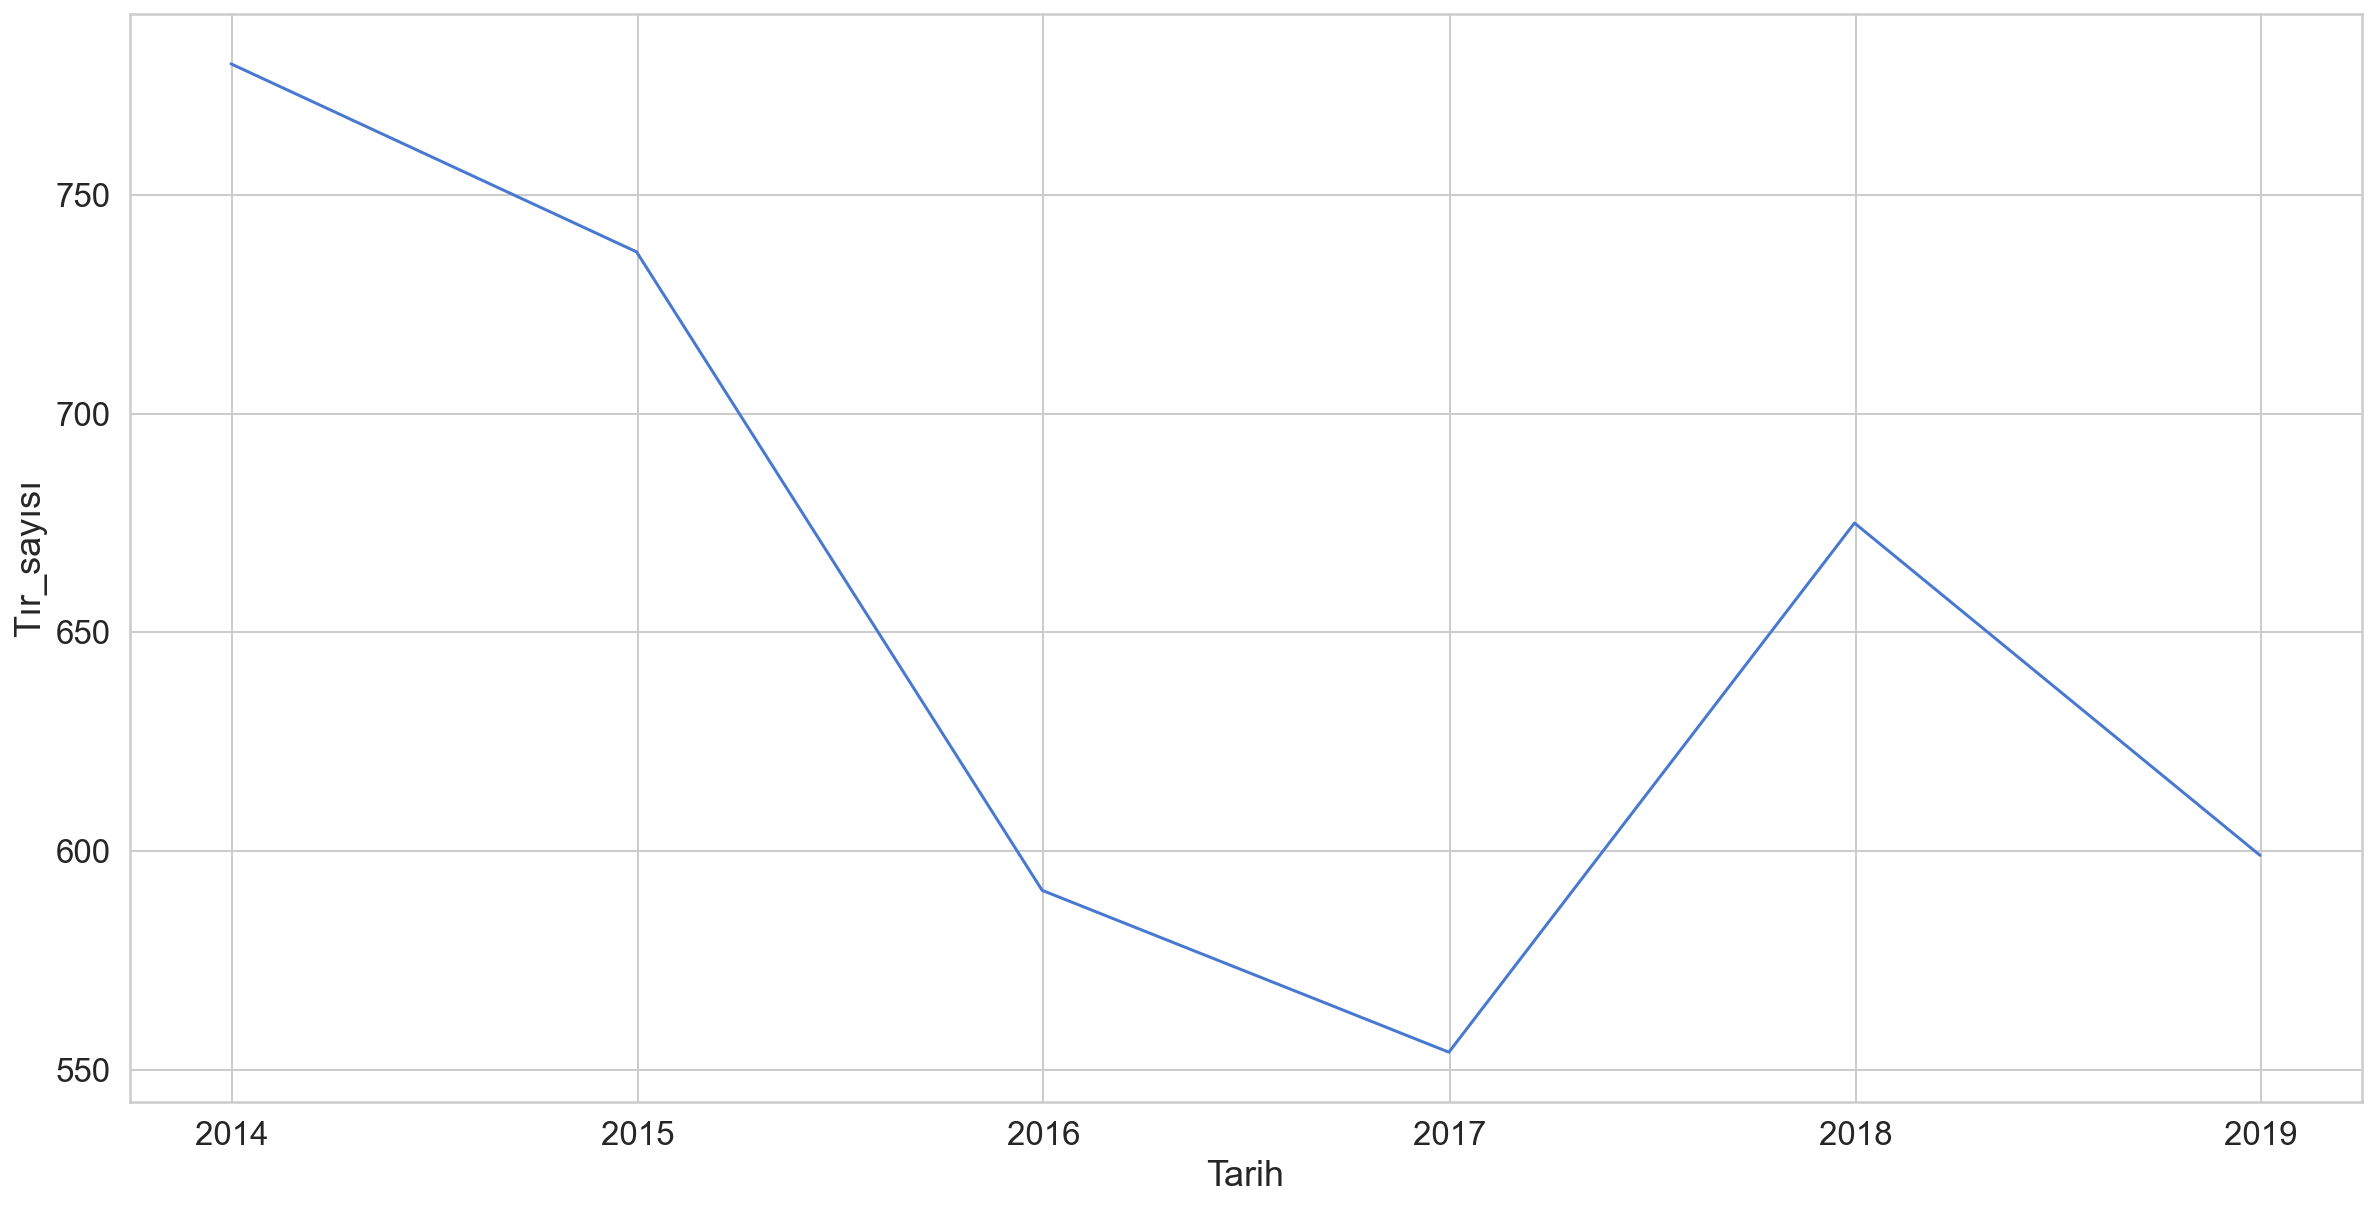

In [10]:
data_by_year=data.resample('A').sum()
sns.lineplot(x=data_by_year.index,y='Tır_sayısı',data=data_by_year)

<AxesSubplot:xlabel='Ay', ylabel='Tır_sayısı'>

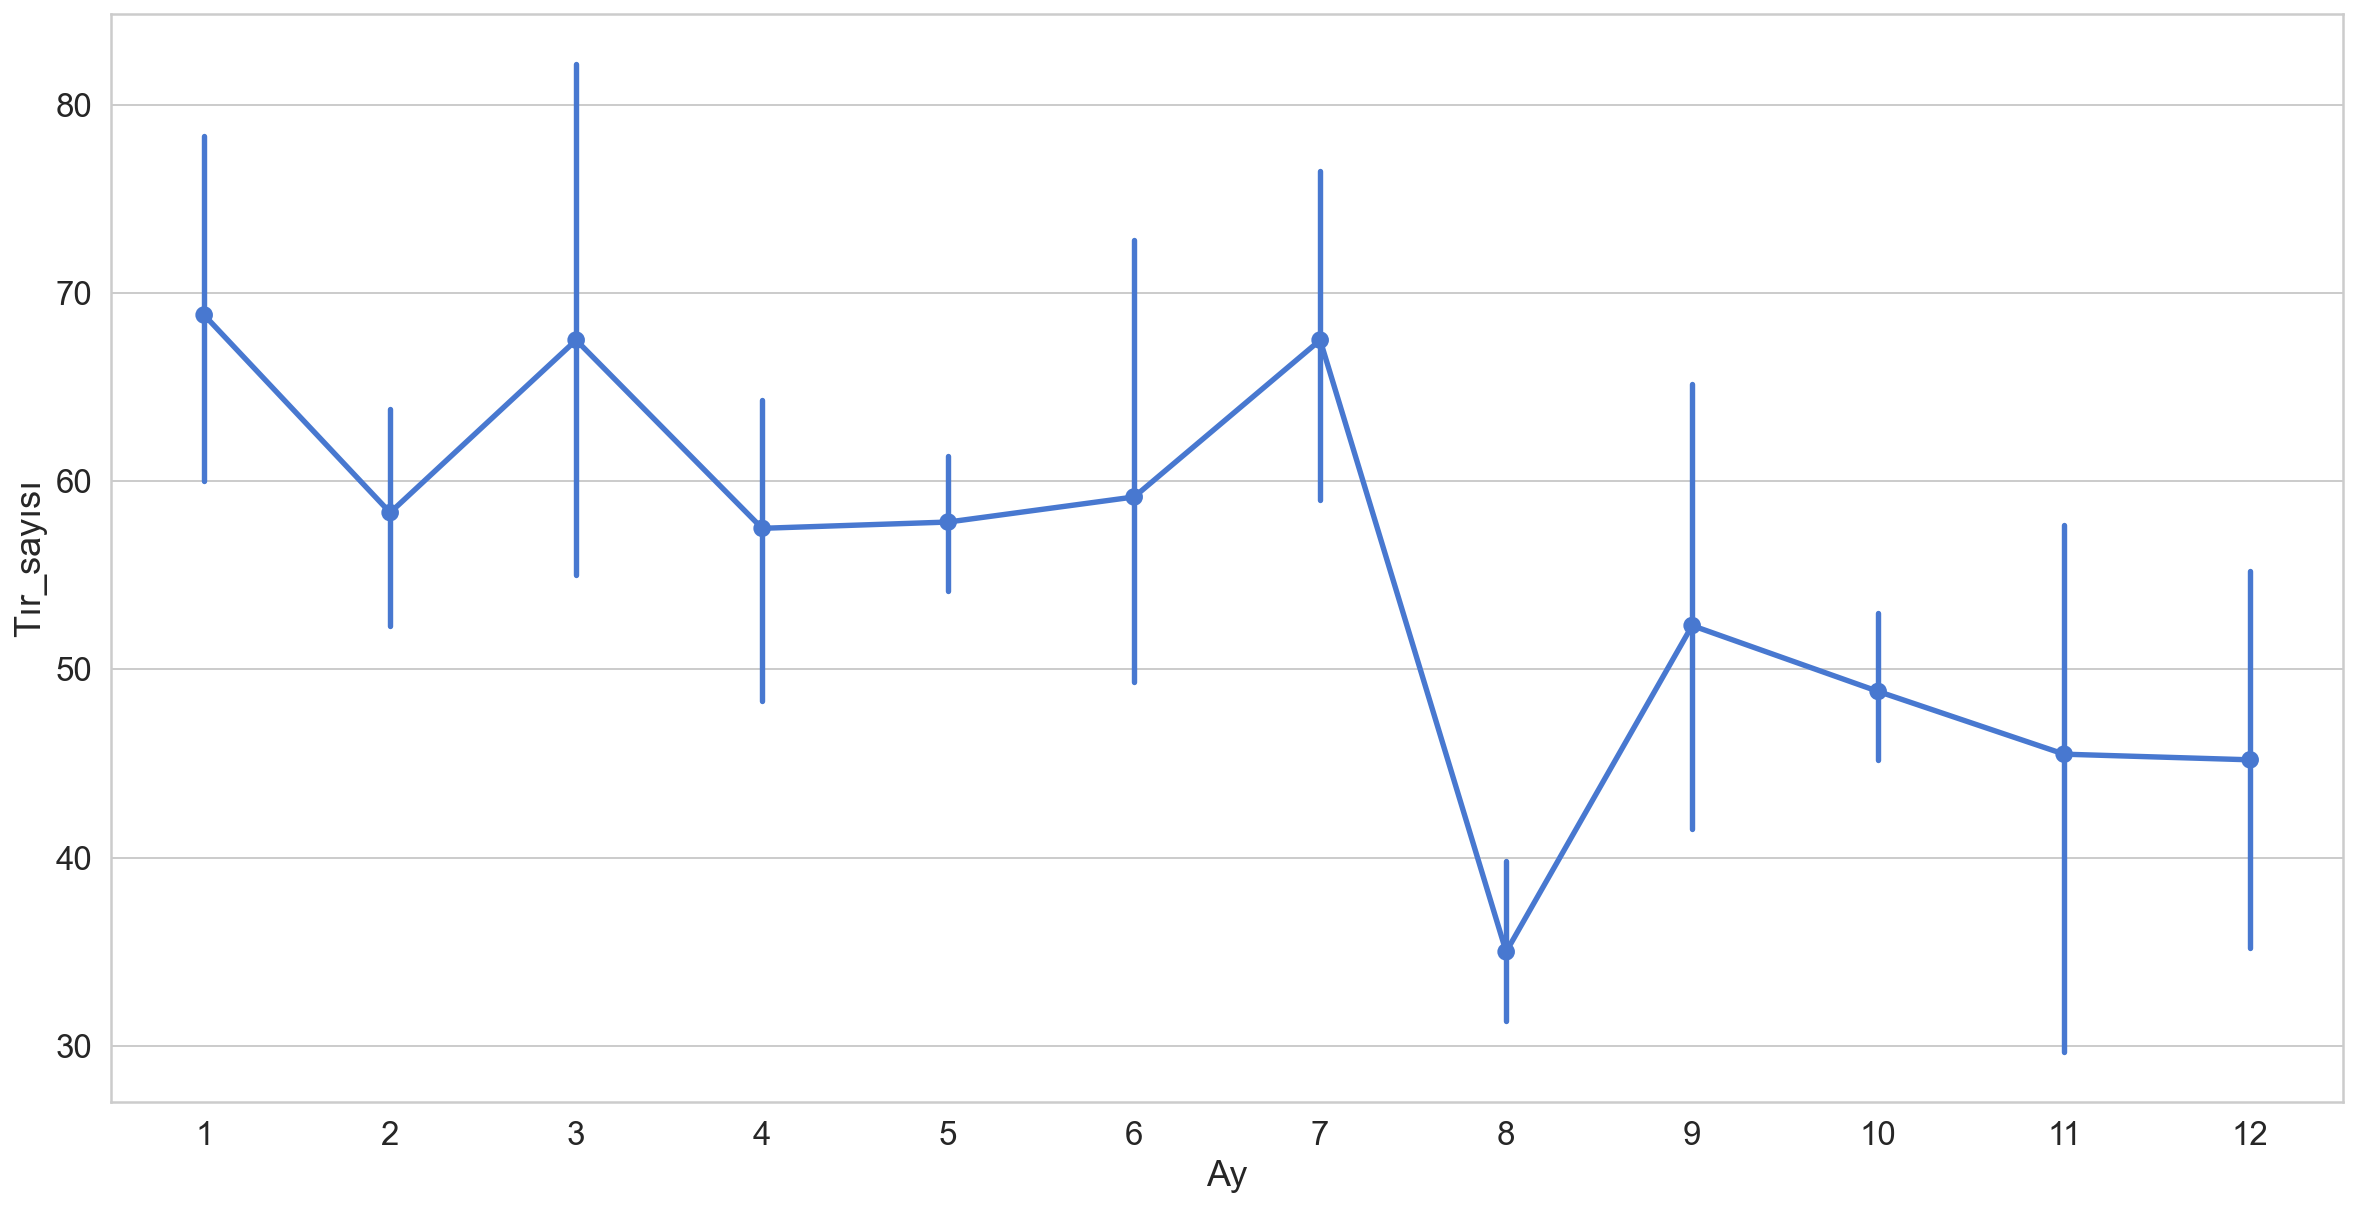

In [11]:
data_by_month=data.resample('M').sum()
data_by_month['Ay']=data_by_month.index.month
sns.pointplot(data=data_by_month,x='Ay',y='Tır_sayısı')
#plt.savefig('ss5')

In [12]:
data.drop(columns=['Tr_ihracat','Tr_ithalat'],inplace=True)

In [13]:
data

,Tır_sayısı,Tekstil_endeks,Tekstil_ihracat,Tekstil_ithalat,Mevsimsellik,Trend,Hafta,Ay,Çeyrek
Tarih,,,,,,,,,
2013-01-06,27,69.705719,966598,532532,10.060784,17.299729,1,1,1
2013-01-13,24,69.705719,966598,532532,7.104357,17.256156,2,1,1
2013-01-20,20,69.705719,966598,532532,3.147930,17.212583,3,1,1
2013-01-27,18,69.705719,966598,532532,1.191502,17.169011,4,1,1
2013-02-03,15,67.873016,948586,530985,-1.764973,17.125486,5,2,1
...,...,...,...,...,...,...,...,...,...
2018-10-07,12,225.217434,1076780,445182,-1.356423,13.716936,40,10,4
2018-10-14,11,225.217434,1076780,445182,-2.373573,13.734086,41,10,4
2018-10-21,10,225.217434,1076780,445182,-3.390723,13.751236,42,10,4


<AxesSubplot:xlabel='Hafta', ylabel='Tır_sayısı'>

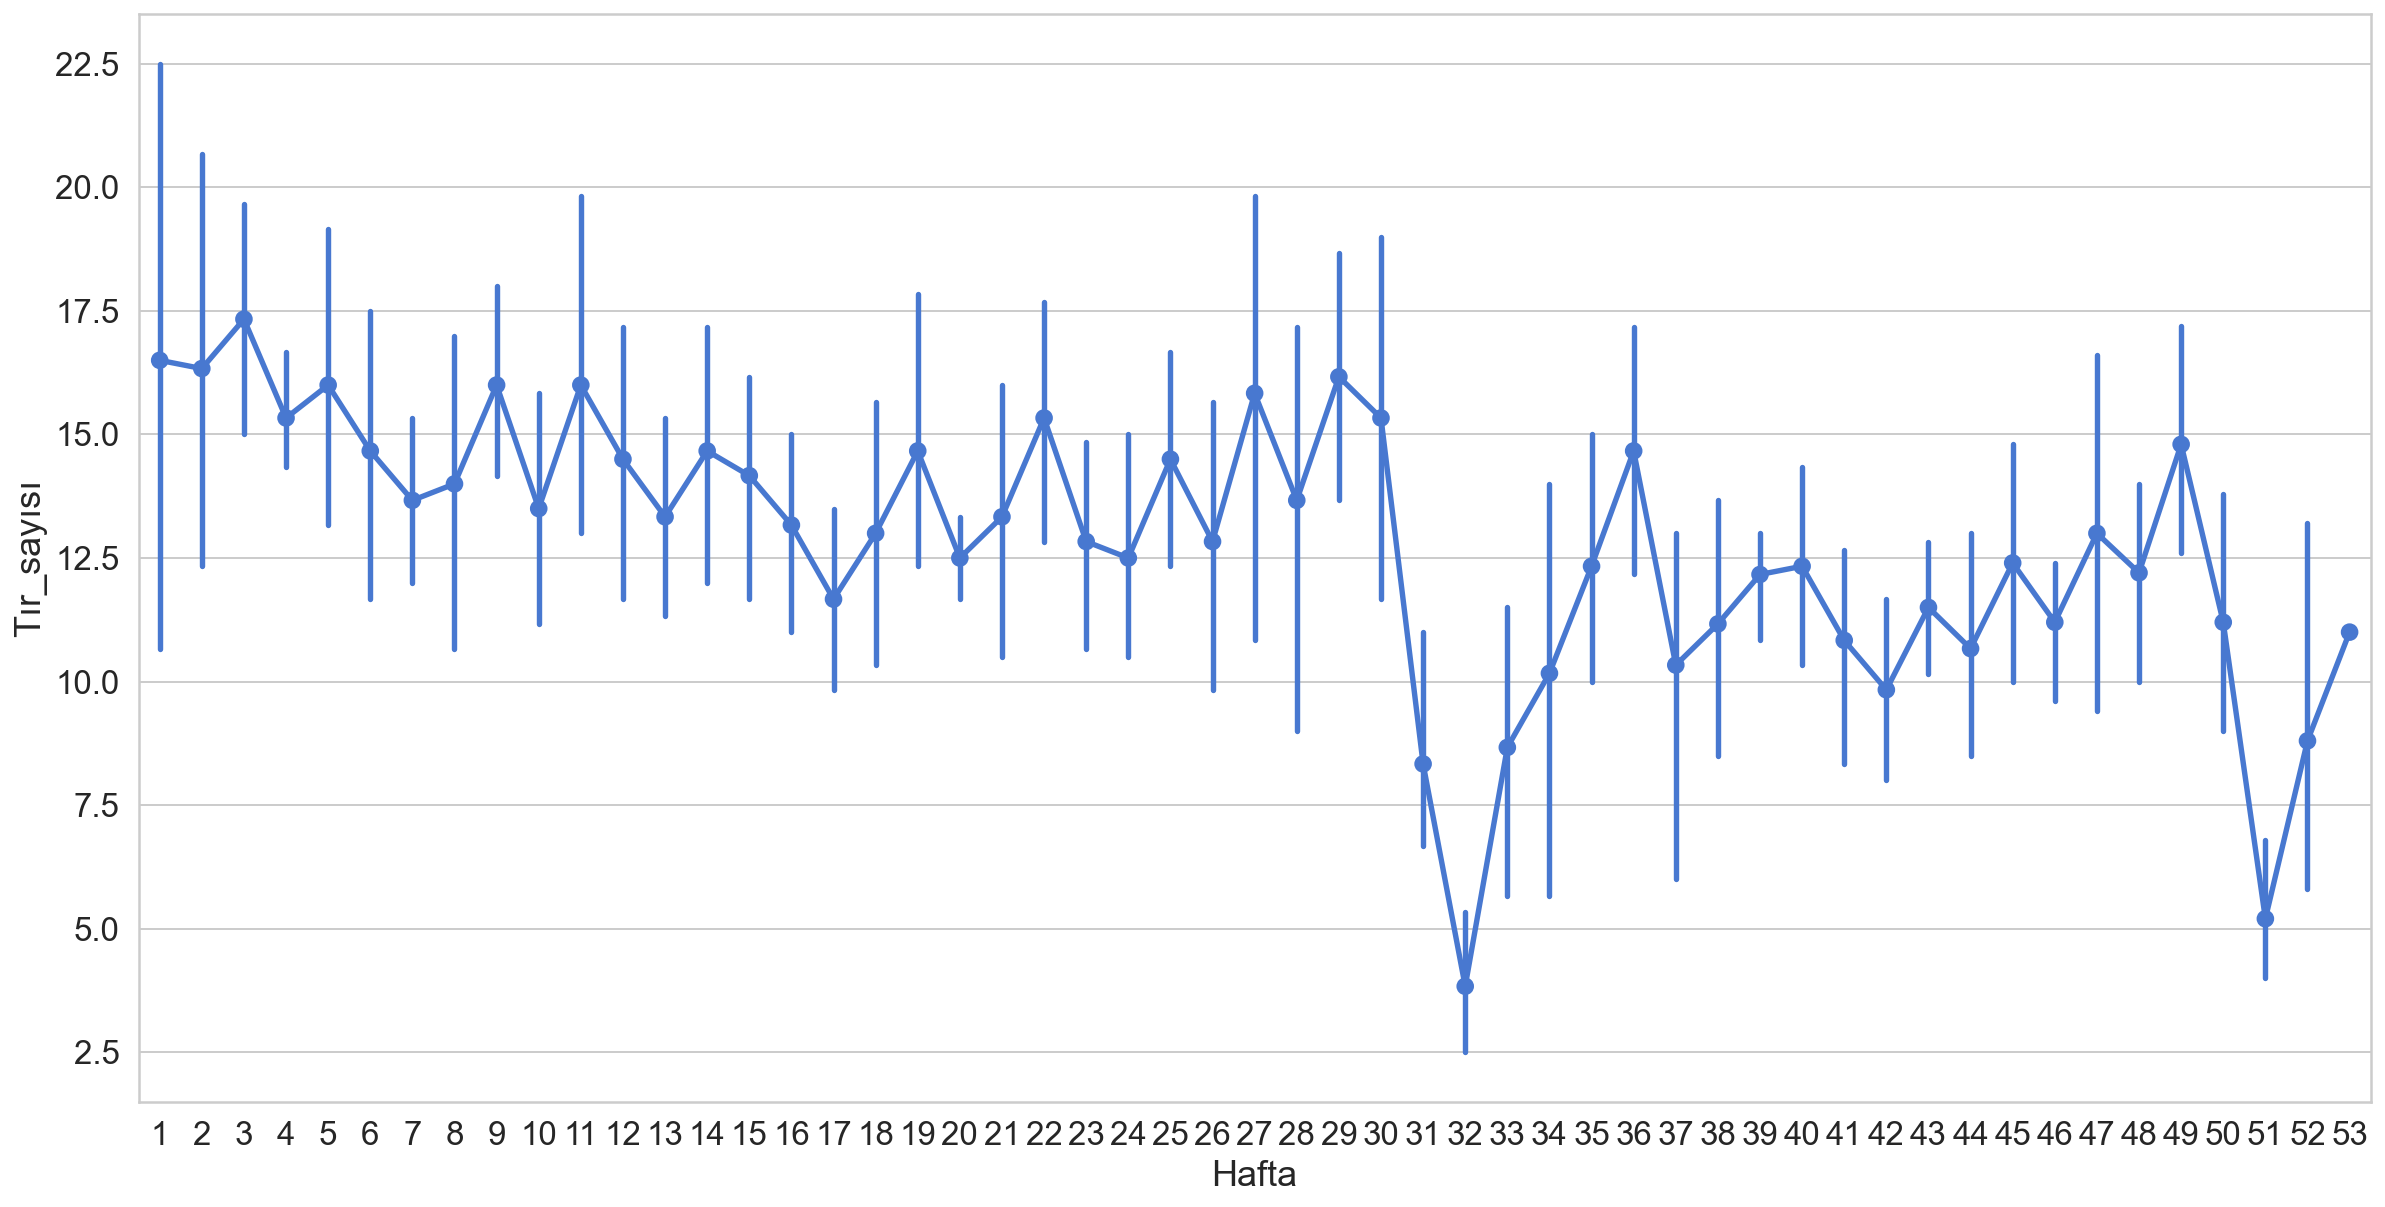

In [14]:
sns.pointplot(data=data,x='Hafta',y='Tır_sayısı')
#plt.savefig('ss6')

In [15]:
scalerx = MinMaxScaler()
scalery = MinMaxScaler()

In [16]:
scalerx.fit(data.iloc[:,1:6])
data.iloc[:,1:6]=scalerx.transform(data.iloc[:,1:6])

In [17]:
scalery.fit(data.iloc[:,0].values.reshape(-1,1))
data.iloc[:,0]= scalery.transform(data.iloc[:,0].values.reshape(-1,1))

In [18]:
"""fig,(ax1)=plt.subplots(ncols=1, figsize=(20,10))

import seaborn as sns

sns.kdeplot(data['Tekstil_endeks'],ax=ax1,label='Tekstil_endeks')
sns.kdeplot(data.Tekstil_ihracat,ax=ax1,label='Tekstil_ihracat')
sns.kdeplot(data.Tekstil_ithalat,ax=ax1,label='Tekstil_ithalat')
sns.kdeplot(data.Trend,ax=ax1,label='Trend')
sns.kdeplot(data.Mevsimsellik,ax=ax1,label='Mevsimsellik')
plt.xlabel(' ')
plt.ylabel(' ')
plt.legend()"""

"fig,(ax1)=plt.subplots(ncols=1, figsize=(20,10))\n\nimport seaborn as sns\n\nsns.kdeplot(data['Tekstil_endeks'],ax=ax1,label='Tekstil_endeks')\nsns.kdeplot(data.Tekstil_ihracat,ax=ax1,label='Tekstil_ihracat')\nsns.kdeplot(data.Tekstil_ithalat,ax=ax1,label='Tekstil_ithalat')\nsns.kdeplot(data.Trend,ax=ax1,label='Trend')\nsns.kdeplot(data.Mevsimsellik,ax=ax1,label='Mevsimsellik')\nplt.xlabel(' ')\nplt.ylabel(' ')\nplt.legend()"

In [19]:
data

,Tır_sayısı,Tekstil_endeks,Tekstil_ihracat,Tekstil_ithalat,Mevsimsellik,Trend,Hafta,Ay,Çeyrek
Tarih,,,,,,,,,
2013-01-06,1.000000,0.012199,0.482149,0.424942,0.968046,1.000000,1,1,1
2013-01-13,0.888889,0.012199,0.482149,0.424942,0.839776,0.992581,2,1,1
2013-01-20,0.740741,0.012199,0.482149,0.424942,0.668120,0.985163,3,1,1
2013-01-27,0.666667,0.012199,0.482149,0.424942,0.583237,0.977744,4,1,1
2013-02-03,0.555556,0.000656,0.444642,0.418686,0.454965,0.970333,5,2,1
...,...,...,...,...,...,...,...,...,...
2018-10-07,0.444444,0.991685,0.711586,0.071683,0.472690,0.389988,40,10,4
2018-10-14,0.407407,0.991685,0.711586,0.071683,0.428560,0.392908,41,10,4
2018-10-21,0.370370,0.991685,0.711586,0.071683,0.384429,0.395828,42,10,4


In [20]:
data.describe()

,Tır_sayısı,Tekstil_endeks,Tekstil_ihracat,Tekstil_ithalat,Mevsimsellik,Trend,Hafta,Ay,Çeyrek
count,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000
mean,0.477960,0.297188,0.511565,0.545736,0.531541,0.313114,26.009836,6.403279,2.472131
std,0.161220,0.223303,0.173714,0.245509,0.173208,0.273349,14.844919,3.395719,1.106222
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.370370,0.139221,0.395822,0.399407,0.432706,0.089411,13.000000,3.000000,1.000000
50%,0.481481,0.222053,0.512176,0.555128,0.536509,0.252924,26.000000,6.000000,2.000000
75%,0.592593,0.416063,0.640992,0.711856,0.640174,0.429209,39.000000,9.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,53.000000,12.000000,4.000000


In [21]:
#data.drop(columns=['Mevsimsellik'],inplace=True)

In [22]:
data.corr().to_excel('2.xlsx')

In [23]:
split_time=int(len(data)*0.855)
y_train=data['Tır_sayısı'][:split_time].values.reshape(-1,1)
y_test=data['Tır_sayısı'][split_time:].values.reshape(-1,1)
x_train=data.iloc[:split_time,1:].values
x_test=data.iloc[split_time:,1:].values

In [24]:
y_train.shape,x_train.shape,y_test.shape,x_test.shape

((260, 1), (260, 8), (45, 1), (45, 8))

In [25]:
model=Sequential()
model.add(Dense(36,input_shape=(x_train.shape[1],)))
model.add(Dense(18,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3))

In [26]:
history=model.fit(x_train,y_train,epochs=90,validation_data=(x_test,y_test),batch_size=20,shuffle=False)

Epoch 1/90
13/13 [==============================] - 0s 13ms/step - loss: 0.4922 - val_loss: 0.1985
Epoch 2/90
13/13 [==============================] - 0s 3ms/step - loss: 0.2703 - val_loss: 0.3059
Epoch 3/90
13/13 [==============================] - 0s 3ms/step - loss: 0.1393 - val_loss: 0.1642
Epoch 4/90
13/13 [==============================] - 0s 2ms/step - loss: 0.0800 - val_loss: 0.0638
Epoch 5/90
13/13 [==============================] - 0s 3ms/step - loss: 0.0575 - val_loss: 0.0443
Epoch 6/90
13/13 [==============================] - 0s 3ms/step - loss: 0.0546 - val_loss: 0.0424
Epoch 7/90
13/13 [==============================] - 0s 3ms/step - loss: 0.0516 - val_loss: 0.0284
Epoch 8/90
13/13 [==============================] - 0s 2ms/step - loss: 0.0369 - val_loss: 0.0224
Epoch 9/90
13/13 [==============================] - 0s 3ms/step - loss: 0.0351 - val_loss: 0.0200
Epoch 10/90
13/13 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.0171
Epoch 11/90
13/13 

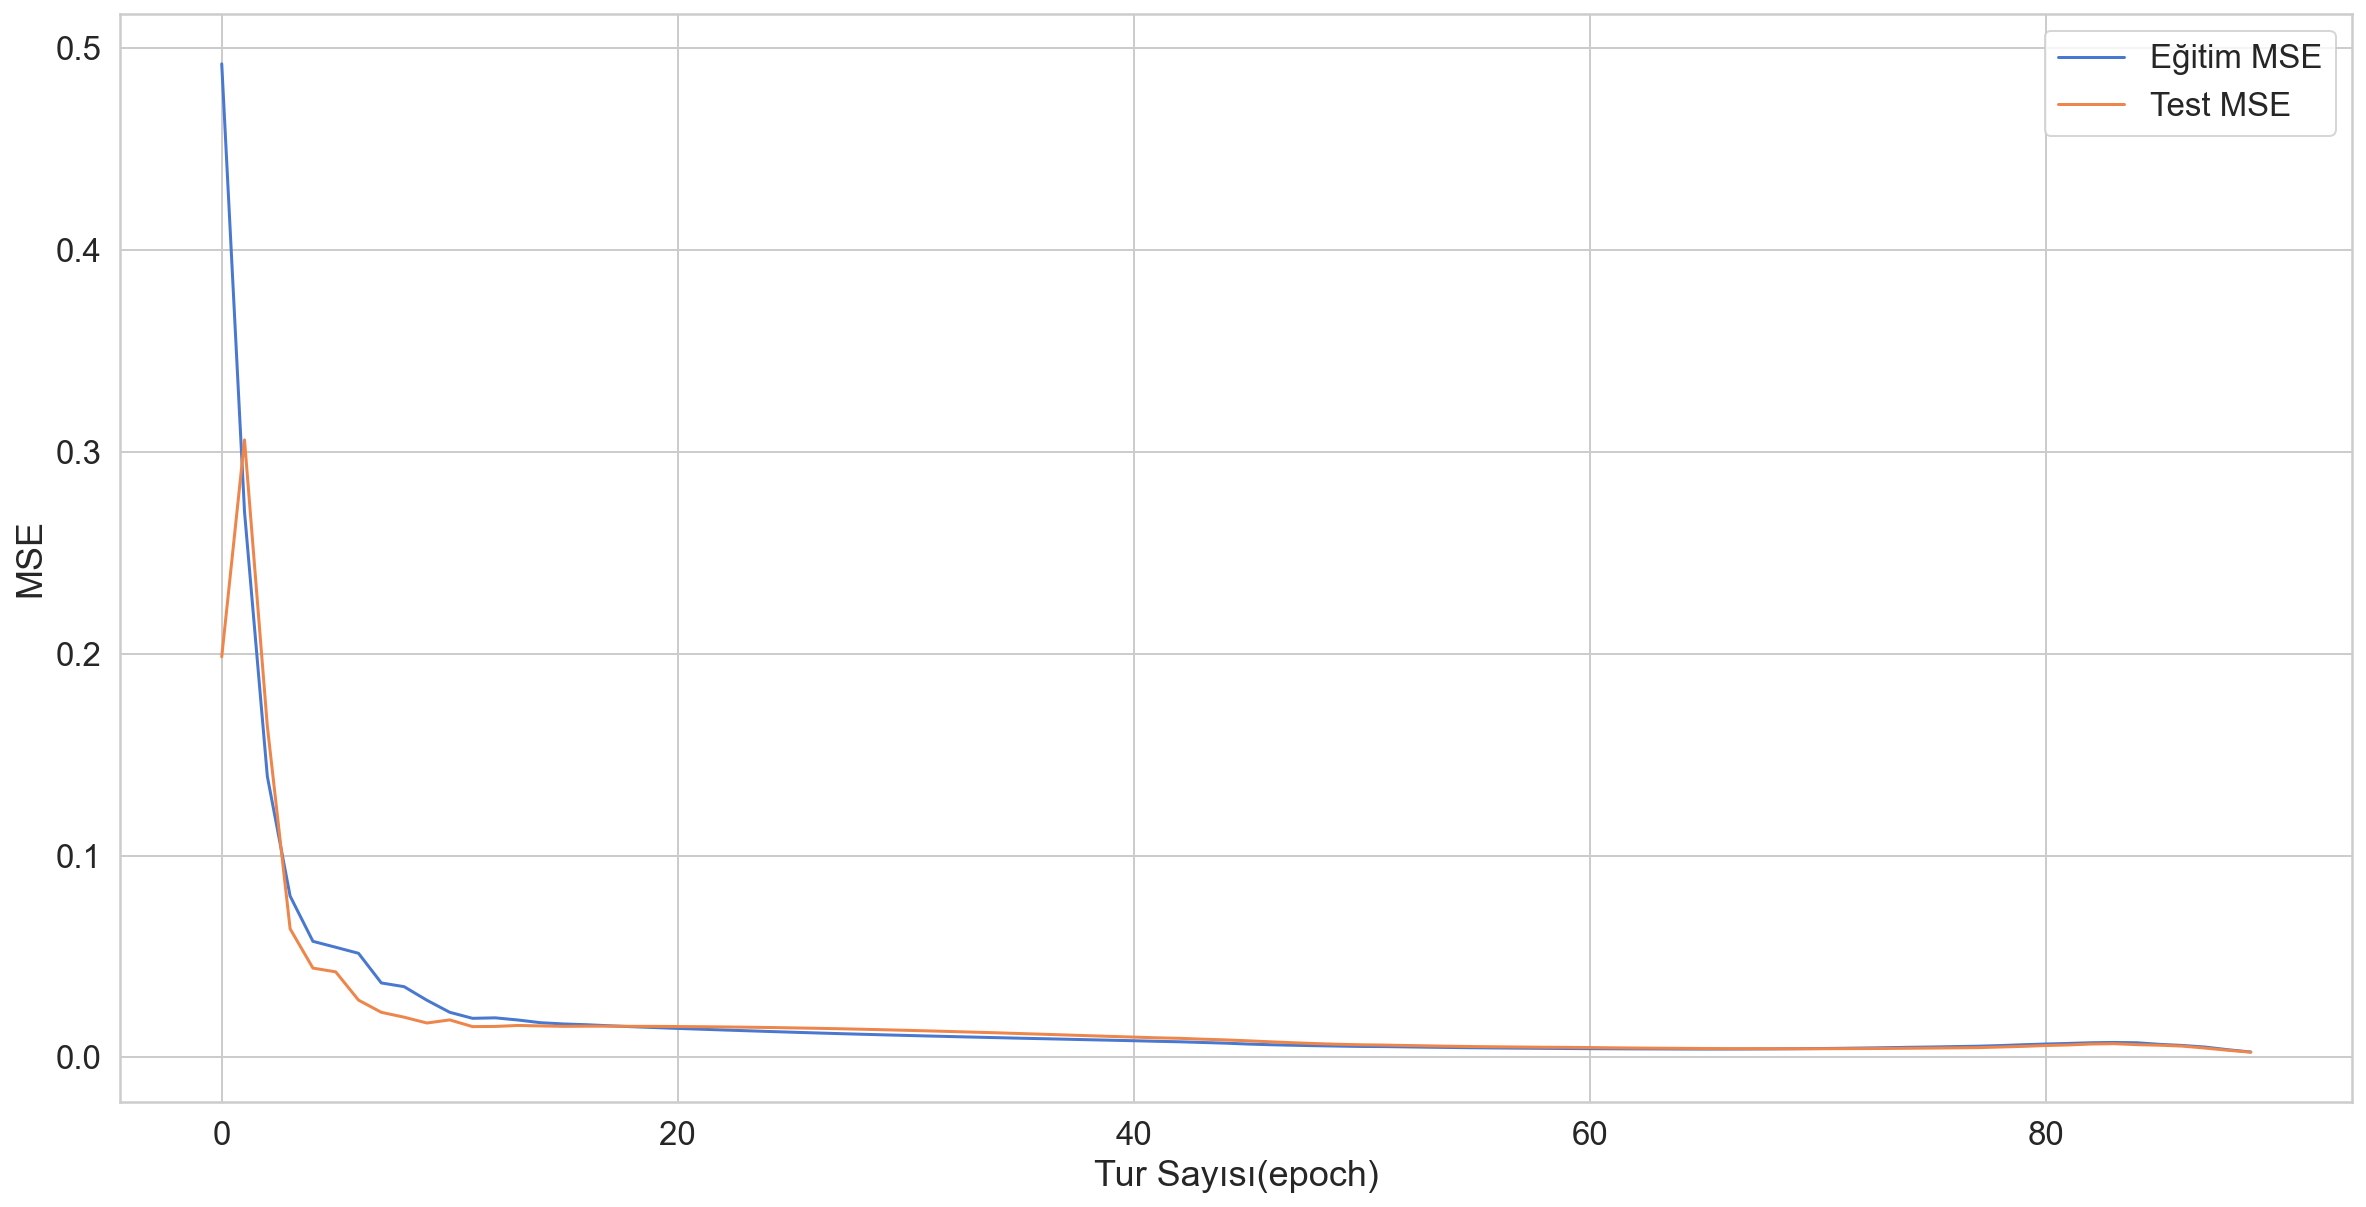

In [27]:
plt.plot(history.history['loss'],label='Eğitim MSE')
plt.plot(history.history['val_loss'],label='Test MSE')
plt.ylabel('MSE')
plt.xlabel('Tur Sayısı(epoch)')
plt.legend()
#plt.savefig('ss7')

In [28]:
y_pred=model.predict(x_test)

In [29]:
y_train_inv=scalery.inverse_transform(y_train)
y_test_inv=scalery.inverse_transform(y_test)
y_pred_inv=scalery.inverse_transform(y_pred)
y_pred_inv2=np.round(y_pred_inv)

In [30]:
MAE=mean_absolute_error(y_test_inv,y_pred_inv)
RMSE=np.sqrt(mean_absolute_error(y_test_inv,y_pred_inv))
R2_Score=r2_score(y_test_inv,y_pred_inv)

In [31]:
#MAE=mean_absolute_error(y_test,y_pred)
#RMSE=np.sqrt(mean_absolute_error(y_test,y_pred))
#R2_Score=r2_score(y_test,y_pred)

In [32]:
evaluate=pd.DataFrame([MAE,RMSE,R2_Score],columns=['Değer'],index=['MAE','RMSE','R²'])
evaluate

,Değer
MAE,1.207669
RMSE,1.098940
R²,0.868730


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                324       
_________________________________________________________________
dense_1 (Dense)              (None, 18)                666       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 19        
Total params: 1,009
Trainable params: 1,009
Non-trainable params: 0
_________________________________________________________________


In [34]:
#next_month1=np.array([[45.        ,  11.        ,  4.        ,  -0.22523679, -0.44587695]])
#yhat = model.predict(next_month1, verbose=0)
#yhat_inv=scalery.inverse_transform(yhat)
#yhat_inv

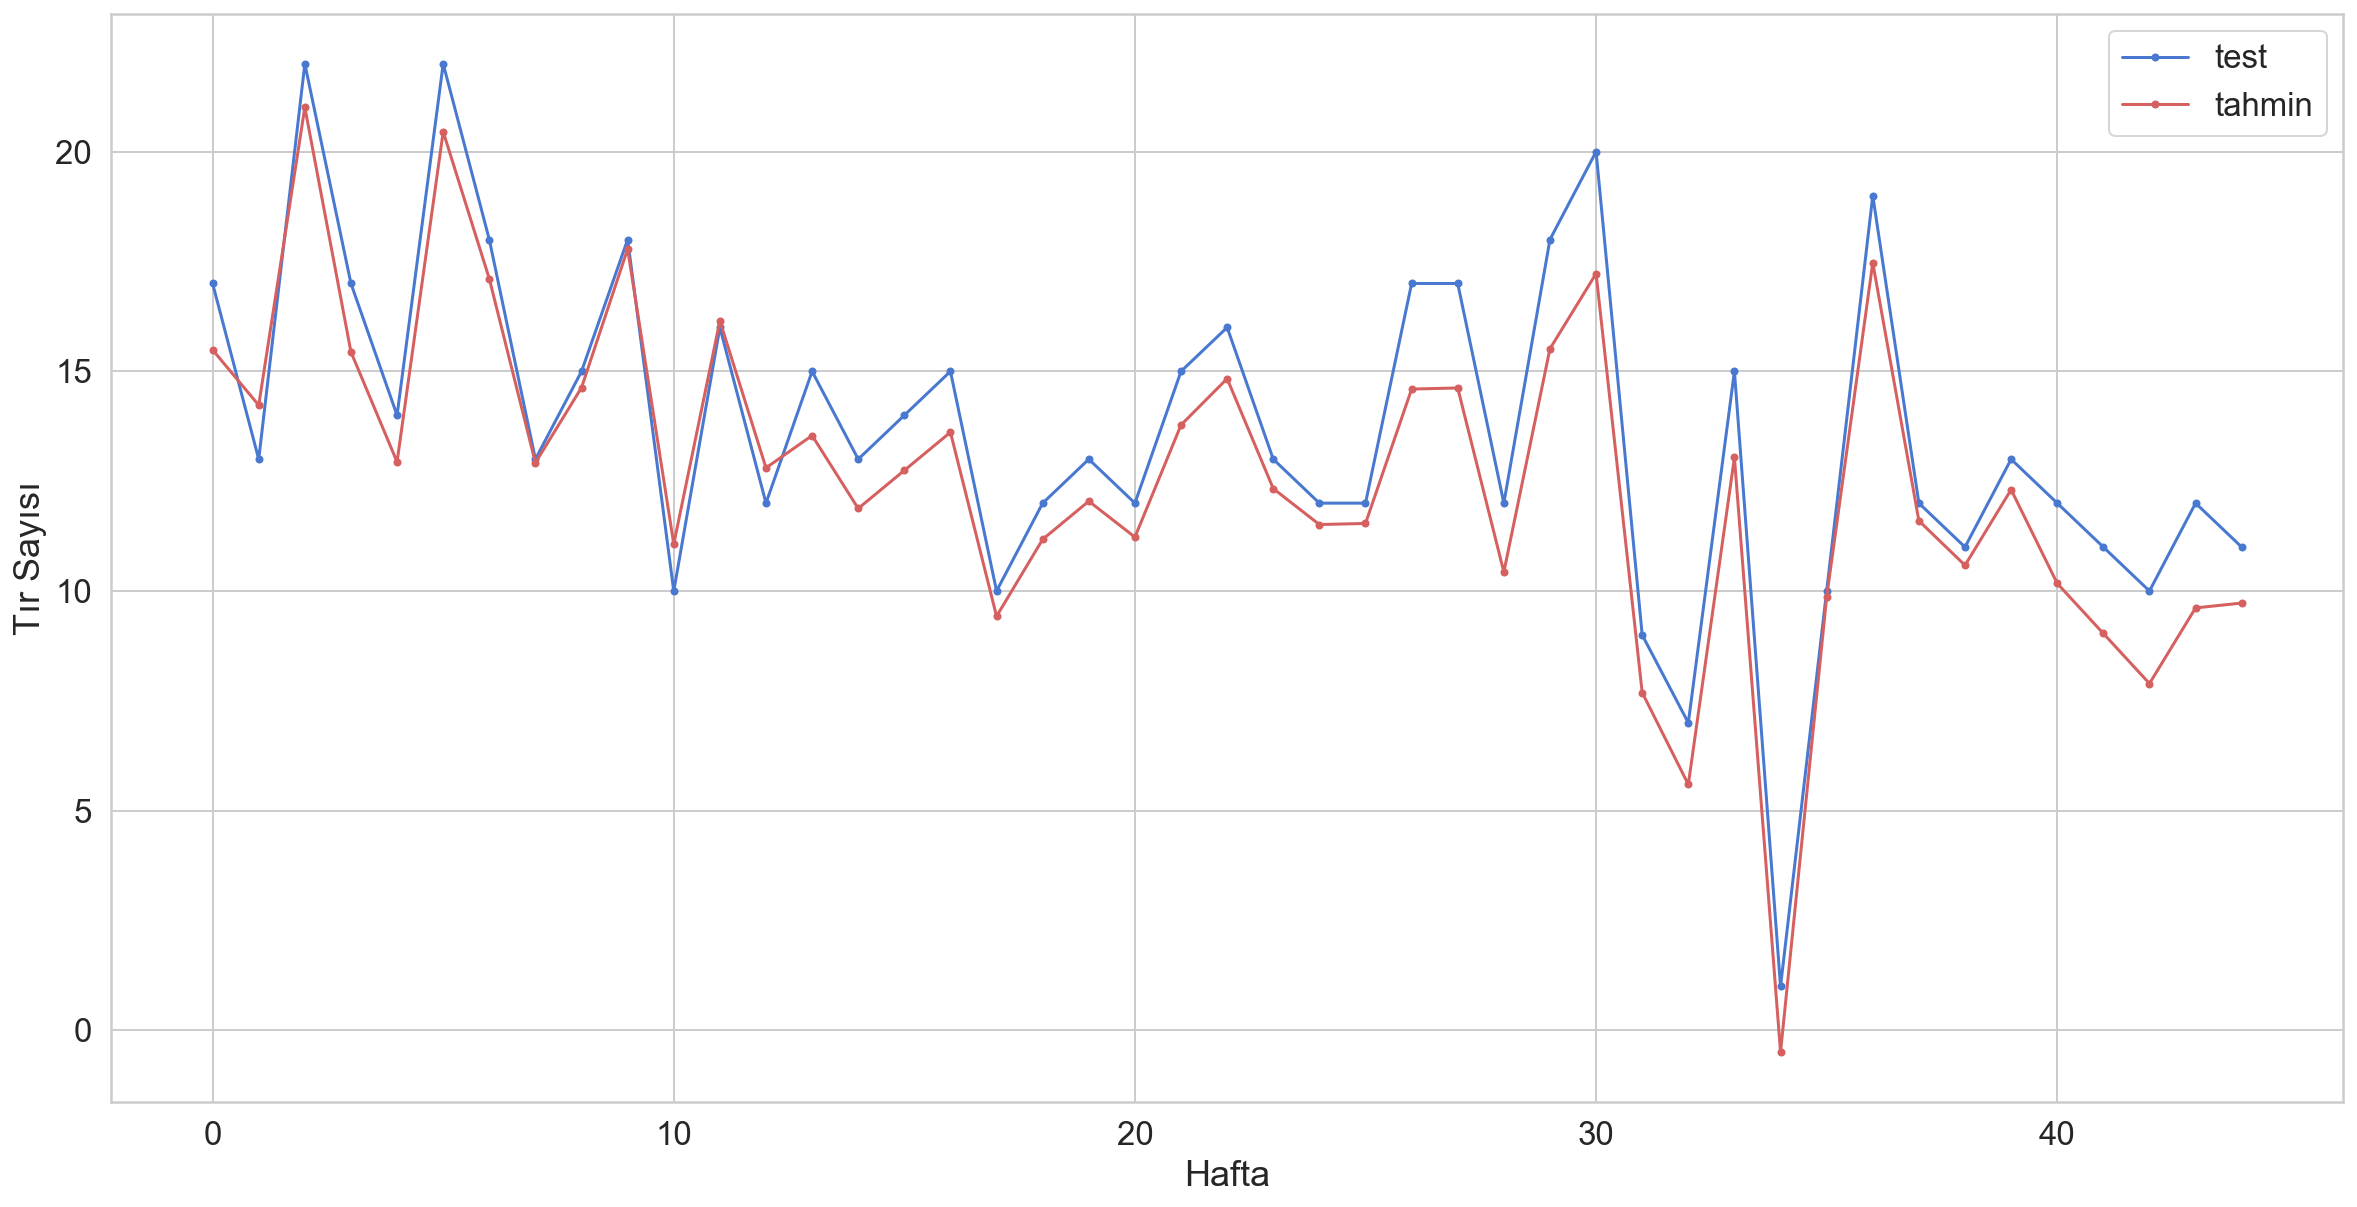

In [35]:
plt.plot(y_test_inv, marker='.', label="test")
plt.plot(y_pred_inv, 'r', marker='.',label="tahmin")
plt.ylabel('Tır Sayısı')
plt.xlabel('Hafta')
plt.legend()
plt.show();

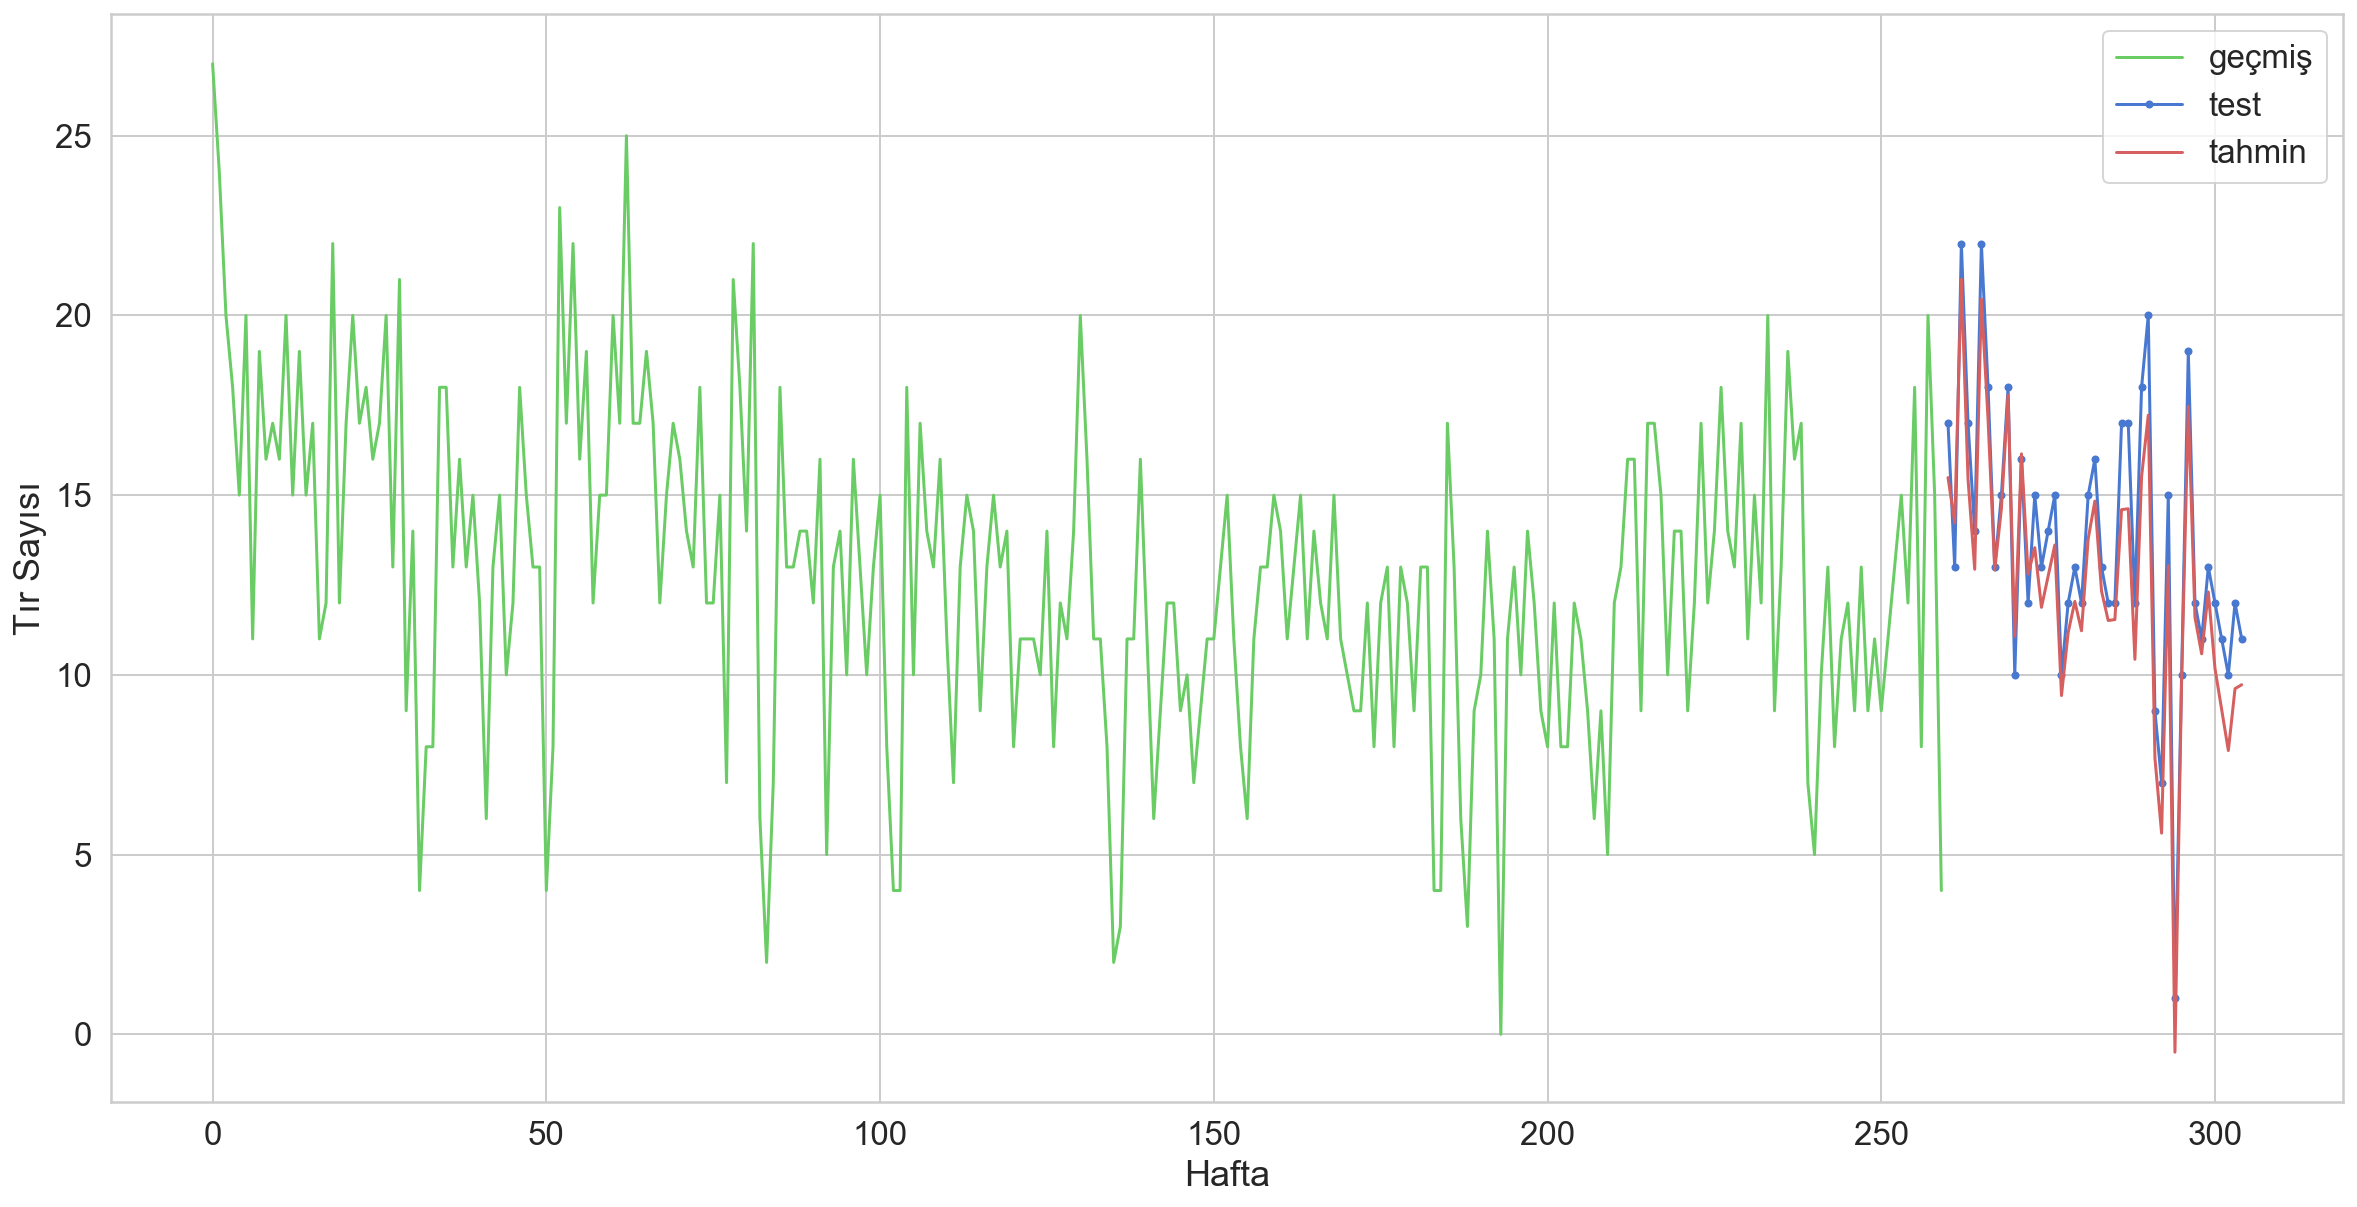

In [36]:
plt.plot(np.arange(0, len(y_train)), y_train_inv, 'g', label="geçmiş")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv, marker='.', label="test")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv, 'r', label="tahmin")
plt.ylabel('Tır Sayısı')
plt.xlabel('Hafta')
plt.legend()
plt.show();